## Phylum Level Comparison 

In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(reshape2)
    library(ggpubr)
    library(matrixStats)
})

In [3]:
df = read.csv("all_samples_phylum.csv")

In [4]:
df[1:5,1:5]

taxa           V1V2_HNO17_S8_R1 V1V2_HNO19_S9_R1 V1V2_HNO209_S14_R1
1 Actinobacteria 25               20               16                
2 Amoebozoa       0                0                0                
3 Archaeplastida  0                0                0                
4 Bacteroidetes  37               18               15                
5 Chloroflexi     0                0                0                
  V1V2_HNO223_S15_R1
1 12                
2  0                
3  0                
4 22                
5  0

In [5]:
df = df[ !grepl( 'POS|NEG', colnames(df))]

In [6]:
df2_mat = as.matrix( df[-1])
rownames(df2_mat) = df$taxa

In [7]:
df2_mat[1:5,1:5]

V1V2_HNO17_S8_R1 V1V2_HNO19_S9_R1 V1V2_HNO209_S14_R1
Actinobacteria 25               20               16                
Amoebozoa       0                0                0                
Archaeplastida  0                0                0                
Bacteroidetes  37               18               15                
Chloroflexi     0                0                0                
               V1V2_HNO223_S15_R1 V1V2_HNO23_S10_R1
Actinobacteria 12                 15               
Amoebozoa       0                  0               
Archaeplastida  0                  0               
Bacteroidetes  22                 32               
Chloroflexi     0                  0

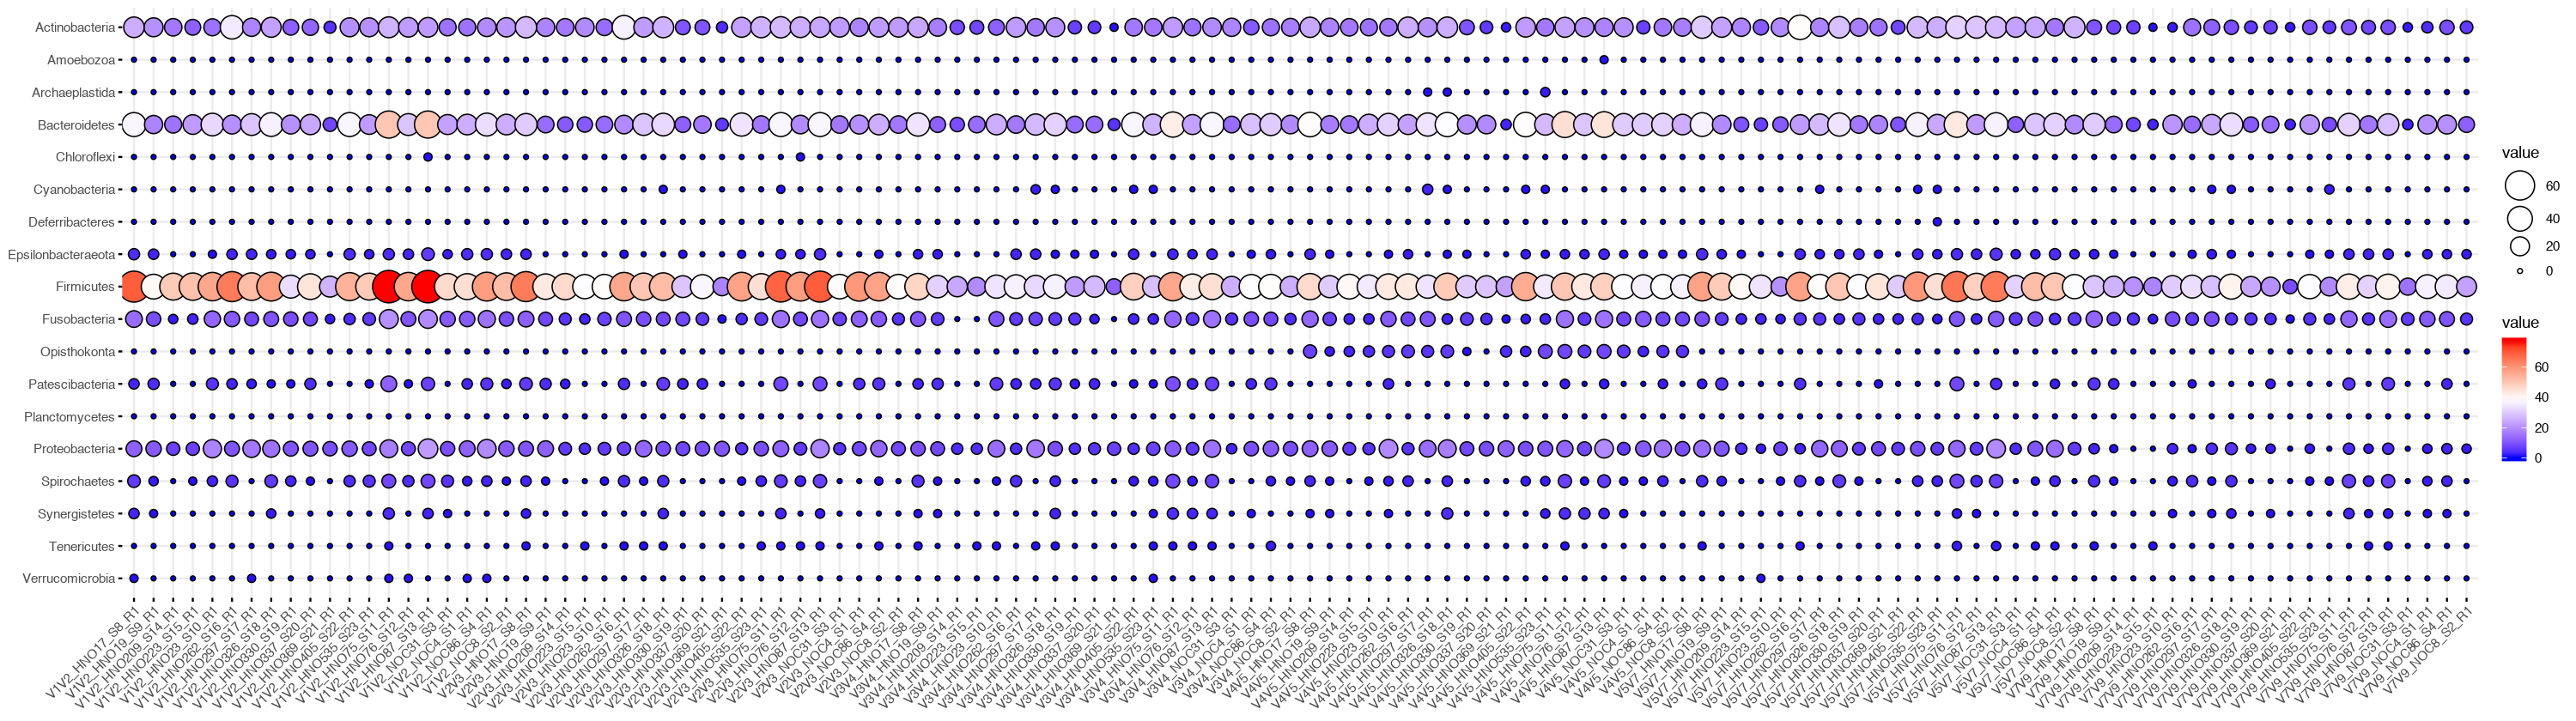

In [8]:
options( repr.plot.width=25, repr.plot.height=7)
ggballoonplot(df2_mat,fill = "value", shape=21) + gradient_fill(c("blue", "white", "red"))

In [10]:
# sets
primer_sets = unique( sapply(strsplit(colnames(df2_mat),'_'),'[[',1) )
primer_sets

[1] "V1V2" "V2V3" "V3V4" "V4V5" "V5V7" "V7V9"

In [11]:
#rowMeans(df2_mat[ , grep( primer_sets[1], colnames(df2_mat))])

In [12]:
new_df = list();
for( i in 1:length(primer_sets) ){
    primer= primer_sets[i]
    print(primer)
    new_df[[primer]] = rowMeans(df2_mat[ , grep( primer, colnames(df2_mat))])
    }

[1] "V1V2"
[1] "V2V3"
[1] "V3V4"
[1] "V4V5"
[1] "V5V7"
[1] "V7V9"


In [13]:
new_df = as.data.frame( new_df )

In [14]:
new_df2 = as.matrix( new_df)
rownames(new_df2) = rownames(new_df)

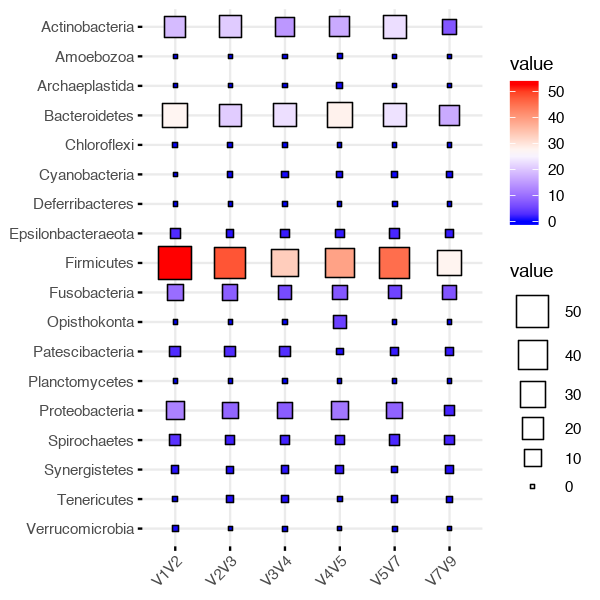

In [15]:
options( repr.plot.width=5, repr.plot.height=5)
ggballoonplot(new_df2,fill = "value", shape=22) + gradient_fill(c("blue", "white", "red"))

In [16]:
dx = as.data.frame( t( df2_mat ) )

In [17]:
dim(dx)

[1] 120  18

In [18]:
dx$group = sapply(strsplit(rownames(dx),'_'),'[',1)

In [19]:
dx %>% head

Actinobacteria Amoebozoa Archaeplastida Bacteroidetes
V1V2_HNO17_S8_R1   25             0         0              37           
V1V2_HNO19_S9_R1   20             0         0              18           
V1V2_HNO209_S14_R1 16             0         0              15           
V1V2_HNO223_S15_R1 12             0         0              22           
V1V2_HNO23_S10_R1  15             0         0              32           
V1V2_HNO262_S16_R1 35             0         0              20           
                   Chloroflexi Cyanobacteria Deferribacteres Epsilonbacteraeota
V1V2_HNO17_S8_R1   0           0             0               4                 
V1V2_HNO19_S9_R1   0           0             0               3                 
V1V2_HNO209_S14_R1 0           0             0               0                 
V1V2_HNO223_S15_R1 0           0             0               0                 
V1V2_HNO23_S10_R1  0           0             0               1                 
V1V2_HNO262_S16_R1 0           0             0               3                 
                   Firmicutes Fusobacteria Opisthokonta Patescibacteria
V1V2_HNO17_S8_R1   69         14           0            3              
V1V2_HNO19_S9_R1   40          9           0            4              
V1V2_HNO209_S14_R1 49          2           0            0              
V1V2_HNO223_S15_R1 51          3           0            0              
V1V2_HNO23_S10_R1  56         13           0            5              
V1V2_HNO262_S16_R1 64         11           0            3              
                   Planctomycetes Proteobacteria Spirochaetes Synergistetes
V1V2_HNO17_S8_R1   0              12             6            3            
V1V2_HNO19_S9_R1   0              11             2            1            
V1V2_HNO209_S14_R1 0               7             0            0            
V1V2_HNO223_S15_R1 0               7             1            0            
V1V2_HNO23_S10_R1  0              18             3            0            
V1V2_HNO262_S16_R1 0              10             5            0            
                   Tenericutes Verrucomicrobia group
V1V2_HNO17_S8_R1   0           1               V1V2 
V1V2_HNO19_S9_R1   0           0               V1V2 
V1V2_HNO209_S14_R1 0           0               V1V2 
V1V2_HNO223_S15_R1 0           0               V1V2 
V1V2_HNO23_S10_R1  0           0               V1V2 
V1V2_HNO262_S16_R1 0           0               V1V2

In [20]:
dx$taxa = rownames(dx)

In [21]:
rownames(dx) = NULL

In [22]:
dxmelt=melt(dx)

Using group, taxa as id variables


In [23]:
head(dxmelt)

group taxa               variable       value
1 V1V2  V1V2_HNO17_S8_R1   Actinobacteria 25   
2 V1V2  V1V2_HNO19_S9_R1   Actinobacteria 20   
3 V1V2  V1V2_HNO209_S14_R1 Actinobacteria 16   
4 V1V2  V1V2_HNO223_S15_R1 Actinobacteria 12   
5 V1V2  V1V2_HNO23_S10_R1  Actinobacteria 15   
6 V1V2  V1V2_HNO262_S16_R1 Actinobacteria 35

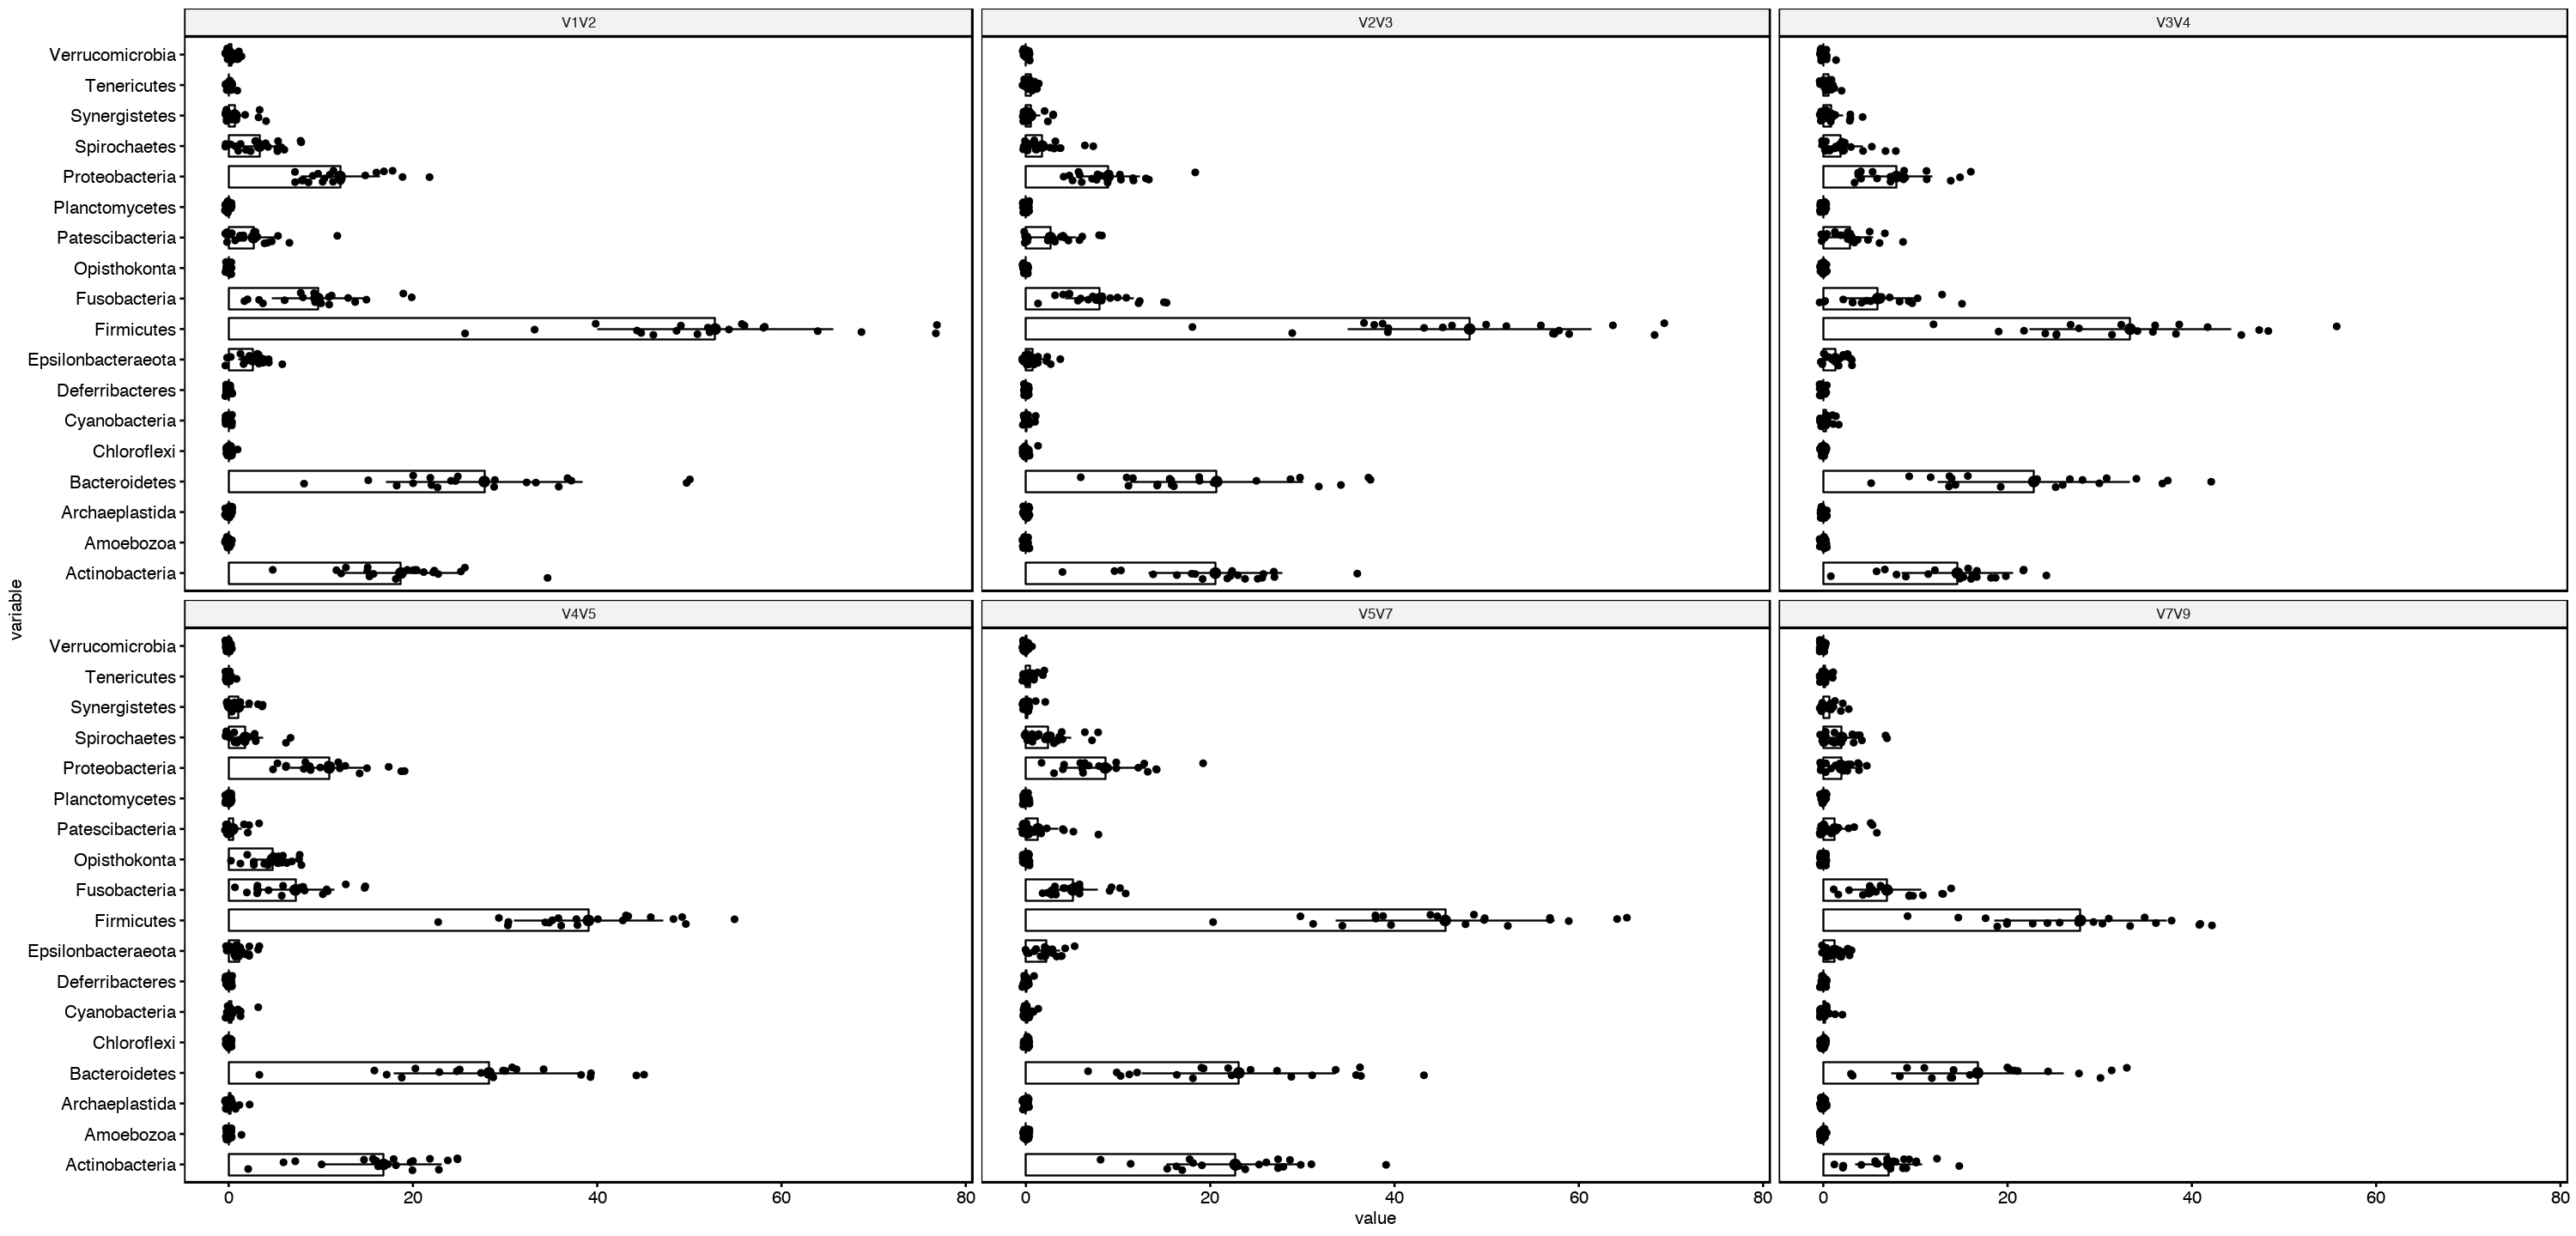

In [24]:
options( repr.plot.width=25, repr.plot.height=12)
ggbarplot(dxmelt, x = "variable", y = "value", facet.by = "group",
          add = c("mean_sd","jitter"), 
          error.plot = c("pointrange"), 
          position = position_dodge(), 
          label = FALSE, 
          orientation = "horiz",
          #color = "taxa",
          #palette = c("","","")
         )

Warning message:
“Removed 2160 rows containing missing values (geom_pointrange).”

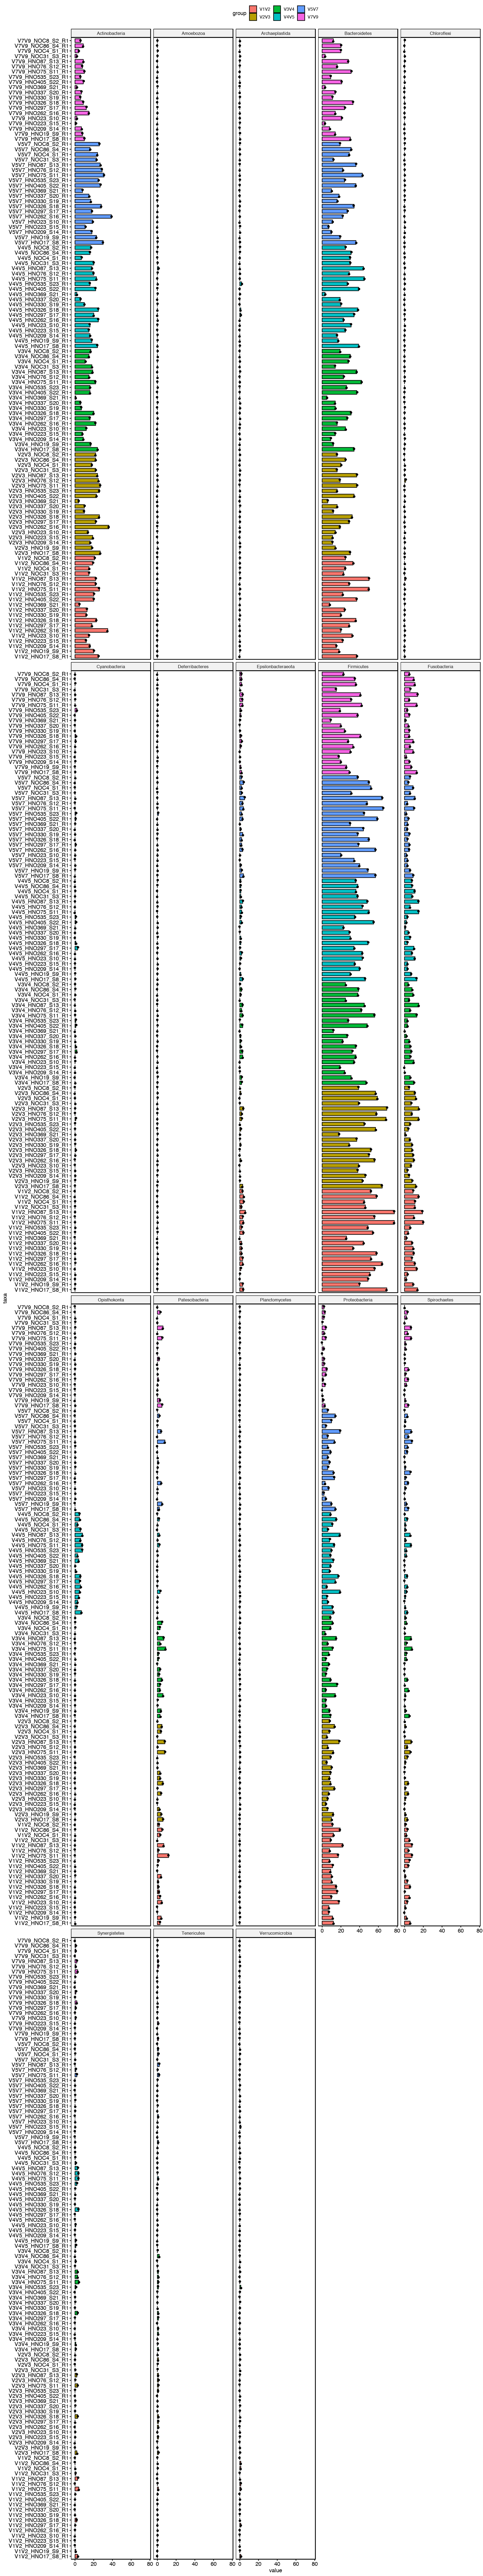

In [25]:
suppressWarnings({
options( repr.plot.width=15, repr.plot.height=80)
ggbarplot(dxmelt, x = "taxa", y = "value", facet.by = "variable",fill="group",
          add = c("mean_sd","jitter"), 
          error.plot = c("pointrange"), 
          position = position_dodge(), 
          label = FALSE, 
          orientation = "horiz",
         )})

Warning message:
“Removed 717 rows containing missing values (geom_pointrange).”

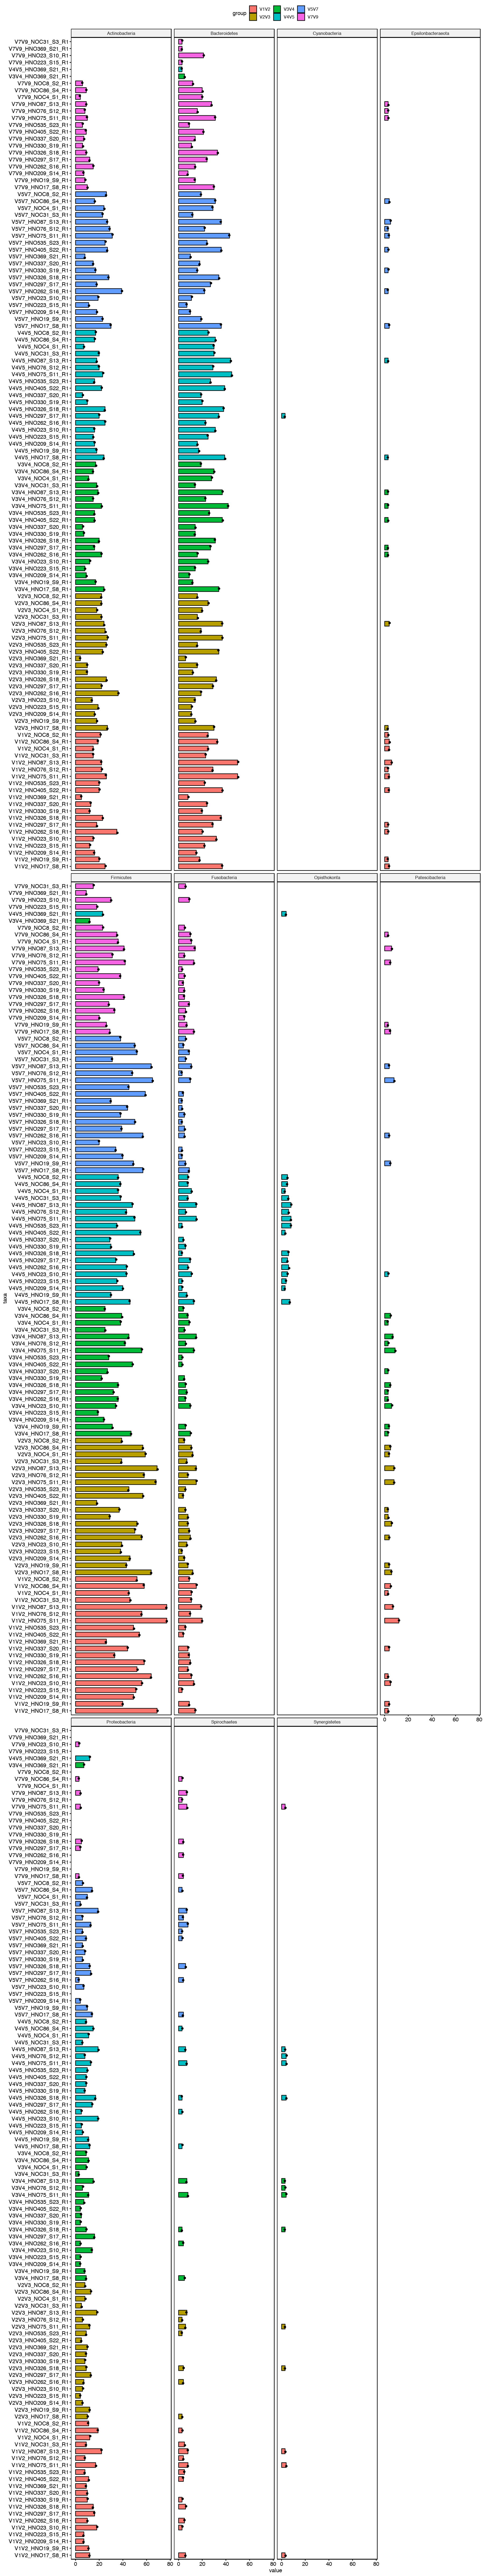

In [27]:
suppressWarnings({
options( repr.plot.width=15, repr.plot.height=80)
dxmelt[dxmelt$value > 2,] %>% 
ggbarplot( x = "taxa", y = "value", facet.by = "variable",fill="group",
          add = c("mean_sd","jitter"), 
          error.plot = c("pointrange"), 
          position = position_dodge(), 
          label = FALSE, 
          orientation = "horiz",
         )})

Warning message:
“Removed 3 rows containing missing values (geom_pointrange).”

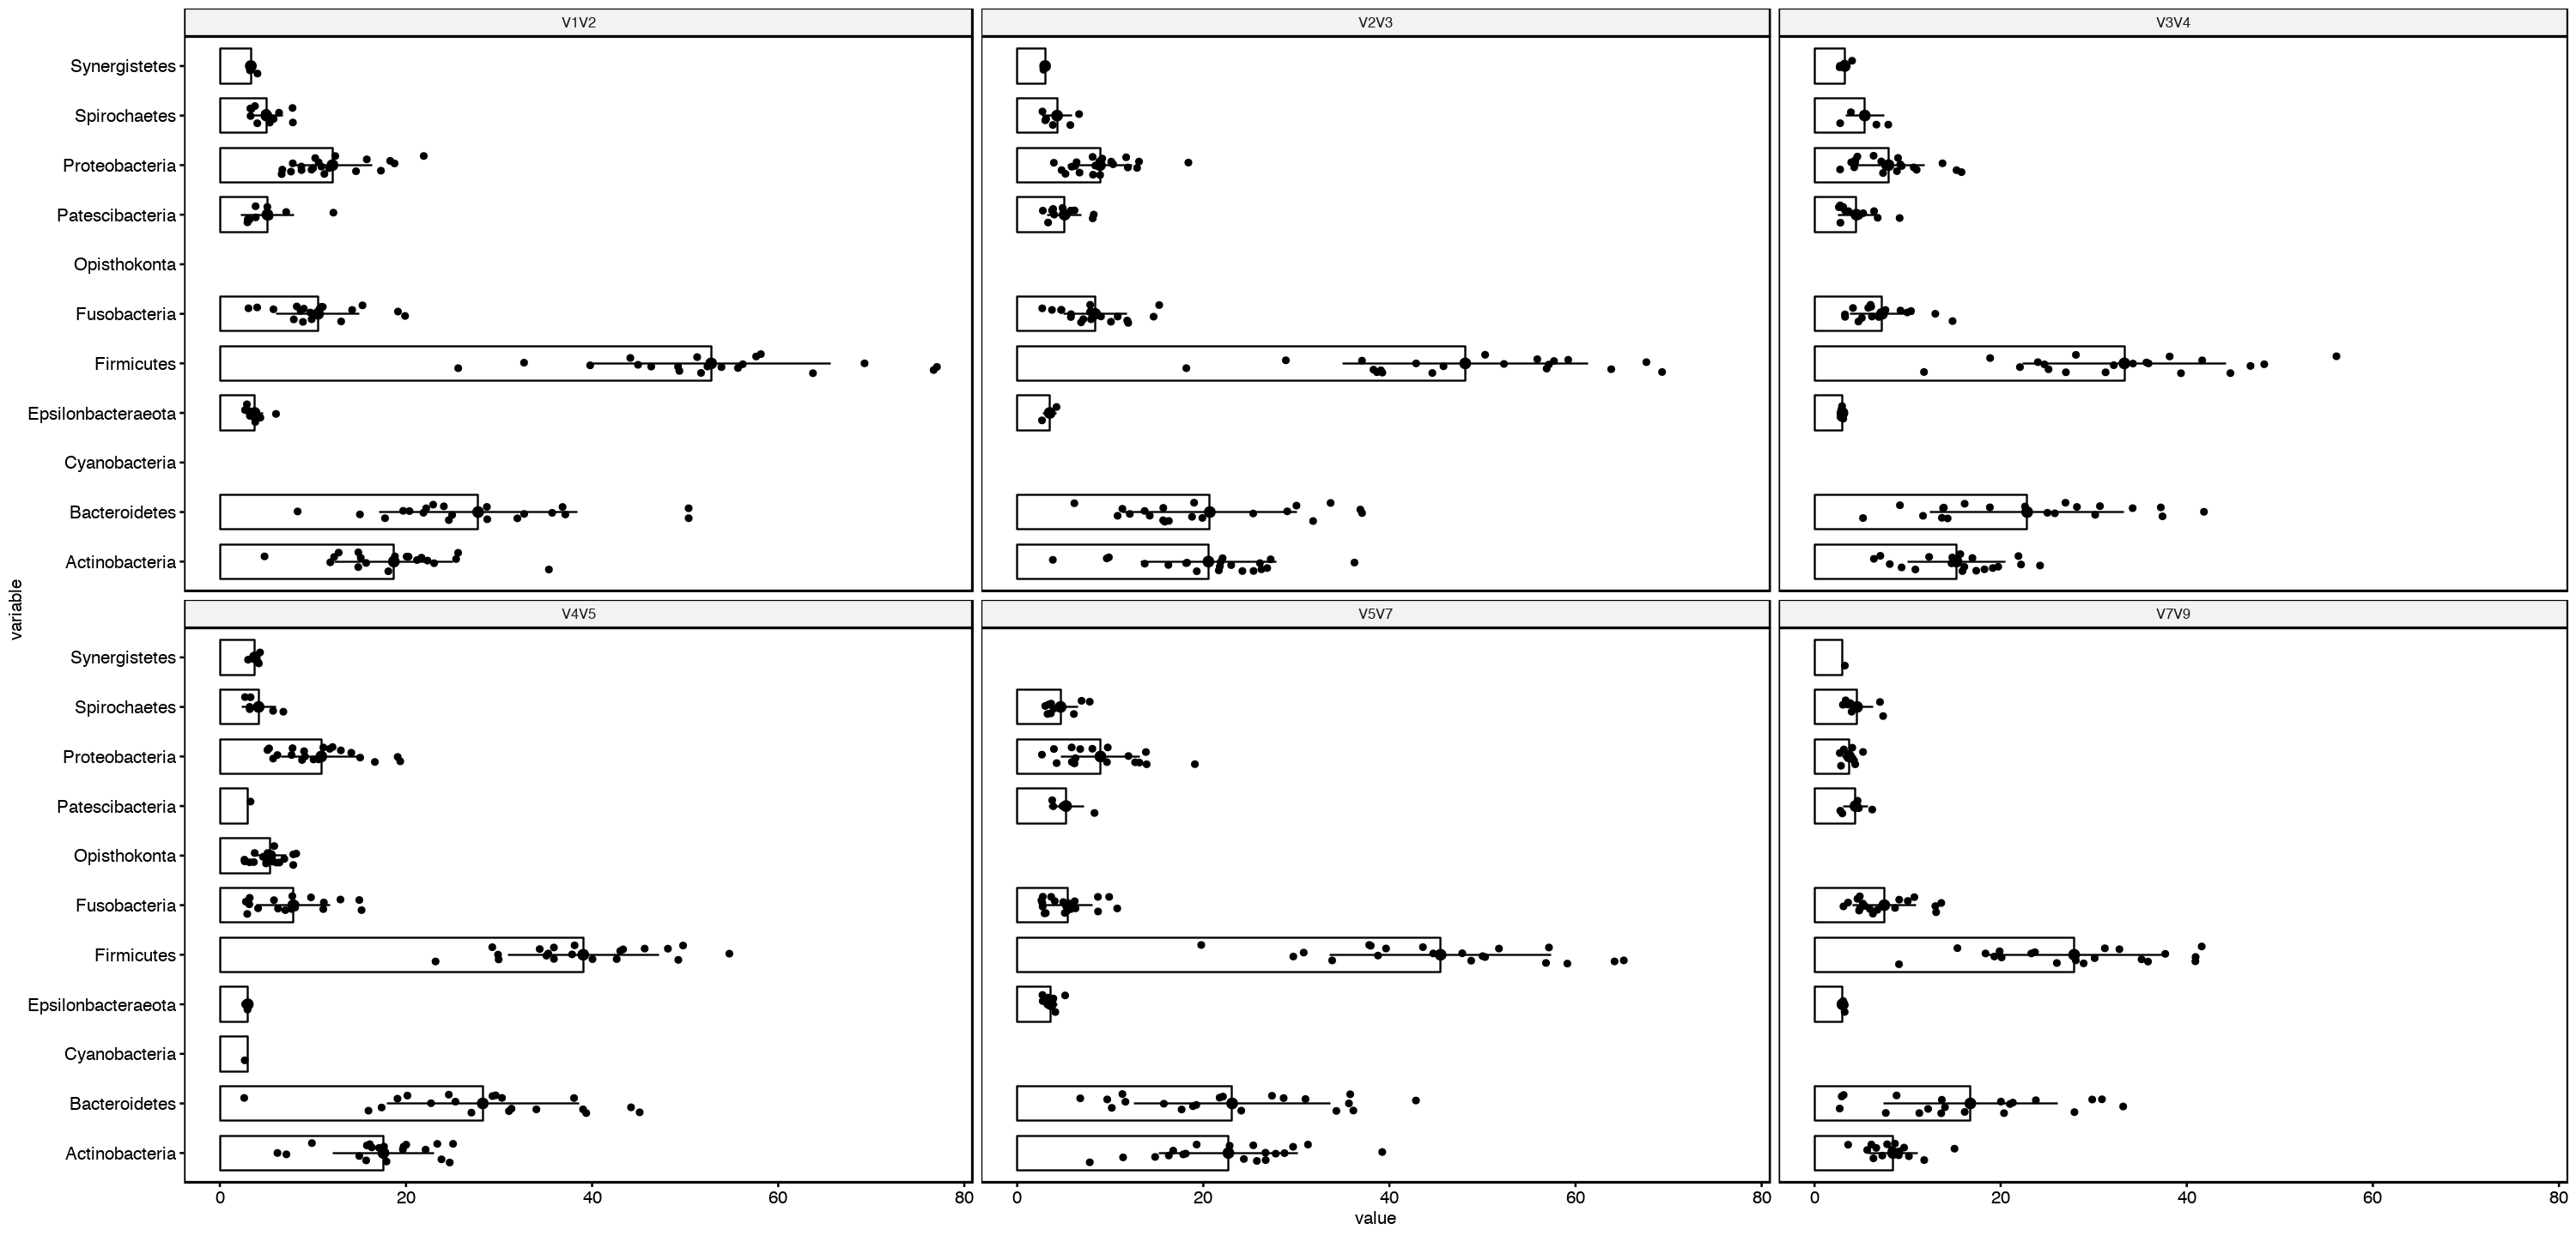

In [28]:
suppressWarnings({
options( repr.plot.width=25, repr.plot.height=12)
dxmelt[dxmelt$value > 2,] %>% 
ggbarplot(x = "variable", y = "value", facet.by = "group",
          add = c("mean_sd","jitter"), 
          error.plot = c("pointrange"), 
          position = position_dodge(), 
          label = FALSE, 
          orientation = "horiz",
          #color = "taxa",
          #palette = c("","","")
         )})